In [4]:
import matplotlib
import matplotlib.pyplot as plot
import numpy as np
import pandas as pd


In [2]:
# First, download data from directory

# Data taken from https://www.kaggle.com/fsiamp/openstack-virtual-machines

import glob

df = pd.concat([pd.read_csv(f) for f in glob.glob('openstack-virtual-machines/*.csv')])

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2903: DtypeWarning: Columns (4,5,6,10) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [4]:
# Show some statistics on the data

df.head()

,vcpus,memory,disk_size,volume_attachments,metadata,server_group,anti_affinity,hyper_threading,ports,networks,config_drive,image_update_policy,flavor_update_policy,disk_config,userdata_update_policy,security_groups
0,6,2,170.0,4.0,False,False,True,1.0,14.0,1.0,False,rebuild_preserve_ephemeral,replace,manual,replace,0.0
1,4,64,50.0,7.0,True,False,False,0.0,7.0,7.0,False,replace,resize,auto,replace,2.0
2,8,16,110.0,6.0,True,True,False,1.0,2.0,3.0,False,replace,resize,manual,replace,1.0
3,4,16,200.0,2.0,False,True,True,0.0,18.0,5.0,False,rebuild,resize,auto,ignore,0.0
4,4,2,120.0,7.0,False,False,True,0.0,0.0,2.0,False,rebuild_preserve_ephemeral,replace,auto,ignore,4.0


In [5]:
# Filter out only vCPU, Memory and Disk Size

new_df = df [['vcpus',' memory', ' disk_size']]

new_df.to_csv('vcpu_mem_disk.csv')

NameError: name 'df' is not defined

In [20]:
# Then start the real analysis

df = pd.read_csv('vcpu_mem_disk.csv',index_col=0)

C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE8B478B70>,
      dtype=object)

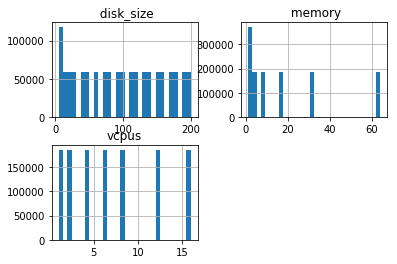

In [27]:
# Show the distribution between attributes
df.hist(bins=30)

# As we can see, these data reveals that there some specific groups are used, more frequently.

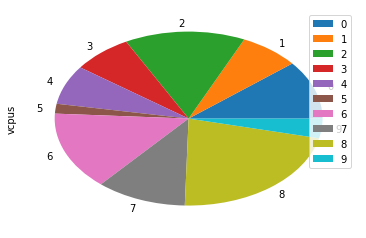

In [47]:
df[:10].plot.pie(y='vcpus')

In [48]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DEBB981080>,
      dtype=object)

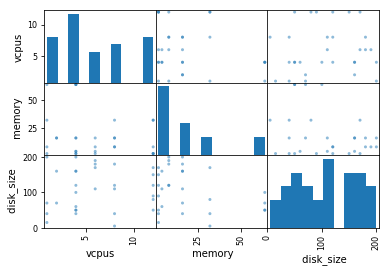

In [50]:
scatter_matrix(df[:30])

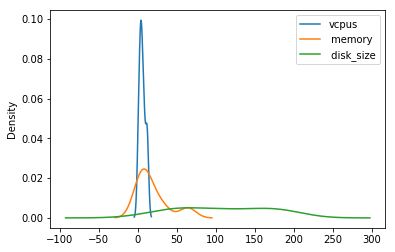

In [51]:
df[:30].plot.kde()

In [65]:
# Plotting our machines in 3D space
%matplotlib auto 
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

test_sample = df[:300]

x = test_sample['vcpus']
y = test_sample[' memory']
z = test_sample[' disk_size']


fig = plt.figure()
ax = fig.gca(projection='3d')


ax.scatter(x, y, z)

# Make legend, set axes limits and labels
ax.legend()

ax.set_xlabel('vCPU')
ax.set_ylabel('vMemory')
ax.set_zlabel('Disk Size')


# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=20., azim=-35)

plt.show()


No handles with labels found to put in legend.


Using matplotlib backend: Qt5Agg
